In [57]:
import os
import graphviz
import owlready2 as owl
import weakref

In [58]:
onto_path = 'file://' + os.path.abspath('ontologies/gistCore9.5.0')
onto = owl.get_ontology(onto_path).load()
print('Loaded owl file at:', onto_path)

Loaded owl file at: file:///Users/lawrence/Documents/GitHub/Data-models-for-projects/Data_model_recorded_as_ontology_Owlready/ontologies/gistCore9.5.0


In [59]:
# FIND THE CLASSES OF INTEREST
Project_class=onto.search(iri='*Project*')
print(Project_class)
Task_class=onto.search(iri='*Task')
print(Task_class)

[gist.Project, gist.Project_1, gist.Project_2, gist.Project_3, gist.Project4, gist.Project0, gist.Project1, gist.Project2]
[gist.Task, gist.hasSubTask, gist.ScheduledTask, gist.hasDirectSubTask]


In [60]:
# SELECT THE CLASSES OF INTEREST FROM SEARCH RESULTS
Project_class_actually=Project_class[0]=Project_class[0]
Task_class_actually=Task_class[0]

In [61]:
# HAVE A LOOK AT CLASS PROPERTIES
print ('is a', Project_class_actually.is_a)
print('equivalent_to:', Project_class_actually.equivalent_to)
print('has subclasses: ', onto.search(subclass_of=Project_class_actually))
for sc in Project_class_actually.ancestors():
    print (sc)
for sc in Project_class_actually.descendants():
    print (sc)
print(Project_class_actually.__dict__)

is a [owl.Thing]
equivalent_to: [gist.Task & gist.hasSubTask.some(gist.Task)]
has subclasses:  [gist.Project]
gist.Project
owl.Thing
gist.Project
{'namespace': get_ontology("https://ontologies.semanticarts.com/o/gistCore#").get_namespace("https://ontologies.semanticarts.com/gist/"), 'storid': 507, '_name': 'Project', 'is_a': [owl.Thing], '_equivalent_to': [gist.Task & gist.hasSubTask.some(gist.Task)], '__module__': 'owlready2.entity', '__doc__': None}


In [6]:
# CREATE INSTANCES OF THIS CLASS

In [62]:
Project=[]
ProjectX=[]
for p in range (0,3):
    name='Project'+str(p)
    Project.append(name)
    ProjectX.append(Project_class_actually(Project[p]))
    print (Project[p], '   ',ProjectX[p])

Project0     gist.Project0
Project1     gist.Project1
Project2     gist.Project2


In [63]:
Task=[]
TaskX=[]
for t in range (0,3):
    name='Task'+str(t)
    Task.append(name)
    TaskX.append(Task_class_actually(Task[t]))
    print (Task[t], '   ',TaskX[t])

Task0     gist.Task0
Task1     gist.Task1
Task2     gist.Task2


In [64]:
# ACCESS INSTANCES BY GENERAL VARIABLE OR BY ITERATING THROUGH CLASS
print (Project_1.name)
print (Project_1.iri)
for p in Project_class_actually.instances():
    print (p.name)
for t in Task_class_actually.instances():
    print (t.name)

Project_1
https://ontologies.semanticarts.com/gist/Project_1
Project_1
Project_2
Project_3
Project4
Project0
Project1
Project2
Task_1_1
Task_1_2
Task_1_3
Task0
Task1
Task2


In [68]:
# CREATE RELATIONSHIPS
ProjectX[0].hasSubTask = [TaskX[0],TaskX[1]]

In [69]:
print (ProjectX[0].get_properties())

{gist.hasSubTask}


In [70]:
ProjectX[0].INDIRECT_hasSubTask

[gist.Task,
 gist.Task & gist.hasSubTask.some(gist.Task),
 gist.Event & gist.hasGoal.some(gist.Intention),
 gist.Task0,
 gist.Task1]

In [23]:
# Retrieve all object properties
properties = list(onto.object_properties())

In [ ]:
properties

In [49]:
h=onto.search(iri='*hasSubTask*')

In [53]:
print(h[0].__dict__)

{'namespace': get_ontology("https://ontologies.semanticarts.com/o/gistCore#").get_namespace("https://ontologies.semanticarts.com/gist/"), 'is_a': [owl.ObjectProperty, owl.TransitiveProperty], 'storid': 509, '_name': 'hasSubTask', '_equivalent_to': [], '__module__': 'owlready2.entity', '__doc__': None, '_domain': None, '_range': None, '_property_chain': None, '_inverse_property': gist.subTaskOf, '_python_name': 'hasSubTask', '_class_property_type': [], '_class_property_some': True, '_class_property_only': False, '_class_property_relation': False, '_inverse_storid': 580}


In [54]:
print('class_property_some:', h[0]._class_property_some)
print('class_property_only:', h[0]._class_property_only)
print('class_property_relation:', h[0]._class_property_relation)

class_property_some: True
class_property_only: False
class_property_relation: False


In [55]:
print('name(string):', h[0].name)
print('module_type:', h[0].__module__)
print('is_a:', h[0].is_a)
print()

name(string): hasSubTask
module_type: owlready2.entity
is_a: [owl.ObjectProperty, owl.TransitiveProperty]



In [13]:
#Try the same but calling the functions from *.py file
import graph_onto as GO

In [16]:
print('-'*20)
entity = GO.keyword_search_onto('Project', onto)

--------------------


False gist.Project
[('Project', 'hasSubTask, some', 'Task')]


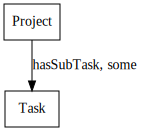

In [17]:
print(entity == onto.Thing, entity)
kg = ontograf_simple(entity, onto)
print(kg)
convert_to_graphviz(kg)